<a href="https://colab.research.google.com/github/nedokormysh/Stepik_data_analysis_R/blob/week_2_stat_part_1/Stepik_data_analysis_R_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
install.packages("ggplot2")
library("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# 2_2_10
Задача про свинок!

Воспользуемся еще одним встроенным набором данных в R  - ToothGrowth. Данные позволяют исследовать рост зубов у морских свинок в зависимости от дозировки витамина C и типа потребляемых продуктов.

Сравните среднее значение длины зубов свинок, которые потребляли апельсиновый сок (OJ) с дозировкой 0.5 миллиграмм, со средним значением длины зубов свинок, которые потребляли аскорбиновую кислоту (VC) с дозировкой 2 миллиграмма.

Значение t - критерия сохраните в переменную t_stat.



In [1]:
head(ToothGrowth)

,len,supp,dose
,<dbl>,<fct>,<dbl>
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5
6,10.0,VC,0.5


In [2]:
unique(ToothGrowth$supp)

[1] VC OJ
Levels: OJ VC

In [3]:
# subset(ToothGrowth$len, ToothGrowth$supp == 'OJ', ToothGrowth$supp == 'VC')

[1] 15.2 21.5 17.6  9.7 14.5 10.0  8.2  9.4 16.5  9.7 19.7 23.3 23.6 26.4 20.0
[16] 25.2 25.8 21.2 14.5 27.3 25.5 26.4 22.4 24.5 24.8 30.9 26.4 27.3 29.4 23.0

In [6]:
subset(dd$len, dd$supp=="OJ" & dd$dose==0.5)

ERROR: ignored

In [10]:
res <- t.test(x = subset(ToothGrowth$len, ToothGrowth$supp=="OJ" & ToothGrowth$dose==0.5),
       y = subset(ToothGrowth$len, ToothGrowth$supp=="VC" & ToothGrowth$dose==2.0))

t_stat <- res$statistic

In [12]:
correct_data <- subset(ToothGrowth, supp=='OJ' & dose==0.5 | supp=='VC' & dose==2)
# t_stat <- t.test(len ~ supp, correct_data)$statistic
head(correct_data)

,len,supp,dose
,<dbl>,<fct>,<dbl>
21,23.6,VC,2
22,18.5,VC,2
23,33.9,VC,2
24,25.5,VC,2
25,26.4,VC,2
26,32.5,VC,2


In [ ]:
df <- ToothGrowth
c1 <- t.test(df$len[df$supp == 'OJ' & df$dose == 0.5],df$len[df$supp == 'VC' & df$dose == 2])
t_stat <- c1$statistic

# 2_2_11

Скачайте данные, посвященные влиянию различного типа лечения на показатель артериального давления.

https://stepik.org/media/attachments/lesson/11504/lekarstva.csv

По всем испытуемым сравните показатель давления до начала лечения (Pressure_before) с показателем давления после лечения (Pressure_after) при помощи t - критерия для зависимых выборок.

В поле для ответа укажите значение t - критерия.

(В качестве десятичного разделителя используйте запятую, например: 123,54)

In [15]:
df <- read.csv(url('https://stepik.org/media/attachments/lesson/11504/lekarstva.csv'))
head(df)

,Group,Uroven_sahara_v_krovi,Pressure_before,Pressure_after,Holesterin..Aprel.,Holesterin..Mart.
,<int>,<int>,<int>,<int>,<int>,<int>
1,2,90,170,135,235,205
2,2,85,160,155,185,195
3,1,95,165,155,235,260
4,1,86,170,165,155,136
5,2,104,170,165,260,250
6,1,95,160,155,200,210


In [21]:
t.test(df$Pressure_before, df$Pressure_after, paired = T)$statistic


	Paired t-test

data:  df$Pressure_before and df$Pressure_after
t = 14.227, df = 173, p-value < 2.2e-16
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 13.24068 17.50644
sample estimates:
mean difference 
       15.37356 


'data.frame':	174 obs. of  6 variables:
 $ Group                : int  2 2 1 1 2 1 2 1 1 1 ...
 $ Uroven_sahara_v_krovi: int  90 85 95 86 104 95 95 90 105 105 ...
 $ Pressure_before      : int  170 160 165 170 170 160 170 160 160 165 ...
 $ Pressure_after       : int  135 155 155 165 165 155 160 150 155 155 ...
 $ Holesterin..Aprel.   : int  235 185 235 155 260 200 225 180 220 175 ...
 $ Holesterin..Mart.    : int  205 195 260 136 250 210 200 155 200 195 ...


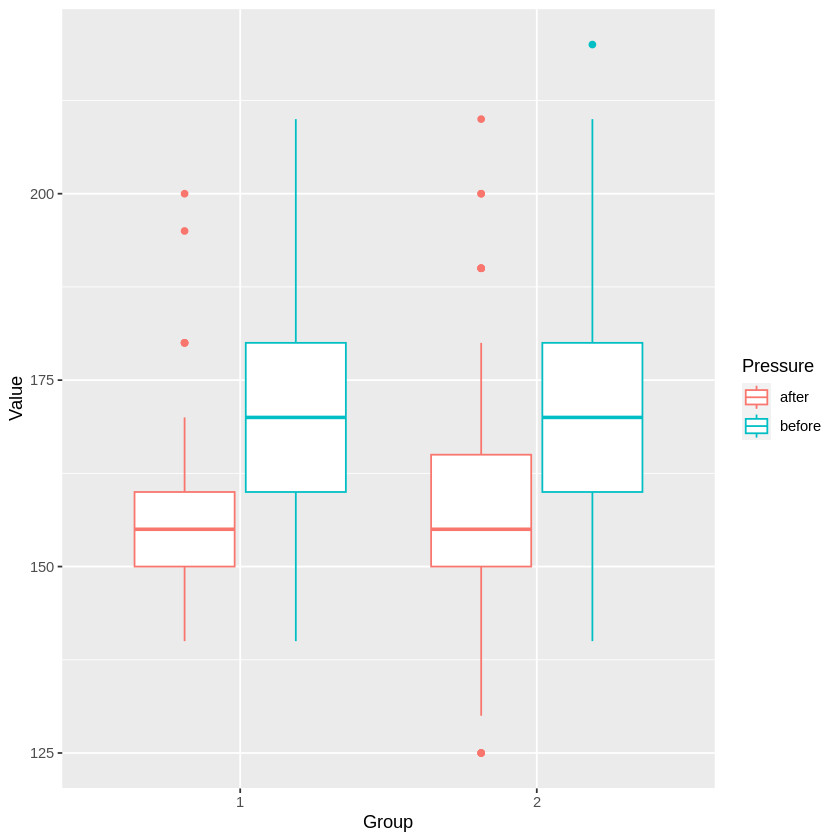

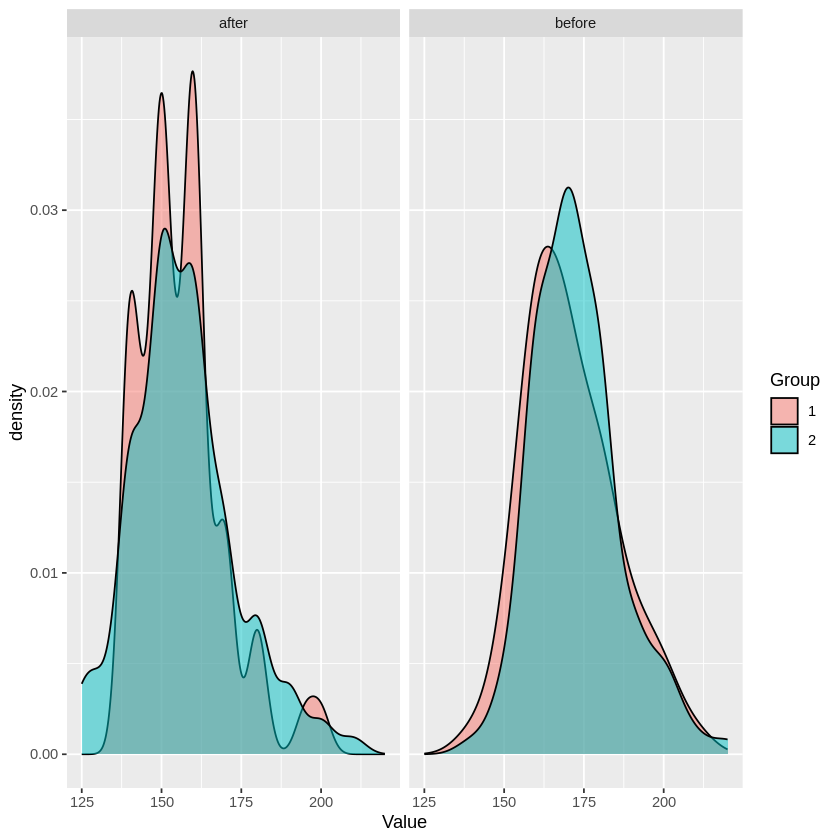

In [19]:
library(ggplot2)

# df <- read.csv("medicines.csv")
str(df)
df$Group = factor(df$Group)

pressures_before <- data.frame(Group = df$Group, Pressure = "before", Value = df$Pressure_before)
pressures_after <- data.frame(Group = df$Group, Pressure = "after", Value = df$Pressure_after)

pressures <- rbind(pressures_before, pressures_after)

ggplot(pressures, aes(Group, Value, col=Pressure))+
  geom_boxplot()

ggplot(pressures, aes(Value, fill=Group))+
  geom_density(alpha = 0.5)+
  facet_wrap(Pressure ~ .)

# 2_2_15

В этом задании нужно проверить гипотезу о равенстве средних двух выборок, загрузив набор данных (нажмите начать решать задание) и выполнив все необходимые операции на вашем компьютере. В скачанных данных вы найдете две переменные: количественную переменную, и номинативную переменную с двумя градациями (которая разделяет наблюдения на две группы).

Для того чтобы без труда прочитать скачанные данные воспользуйтесь функцией:
read.table("dataset_11504_11.txt")
# разумеется, у вас может быть другое название файла
# также убедитесь, что файл находится в рабочей директории
# или укажите полный путь к файлу
Сначала с помощью теста Бартлетта проверьте гомогенность дисперсий двух выборок. В случае, если дисперсии значимо не отличаются (с уровнем 0.05), примените тест Стьюдента, иначе - непараметрический тест (Манна-Уитни). В поле для ответа введите получившийся p-value, с точностью четыре знака после запятой.
Обратите внимание, что по умолчанию в t.test стоит var.equal = FALSE, так как мы будем применять его только в случае гомогенности дисперсий, измените значение этого параметра на  var.equal = TRUE.

Каждый раз вы будете скачивать новый набор данных.

Важно - в этом ответе используйте точку как десятичный разделитель!

Если p - value сильно меньше 0.05, например, 1.01e-07, в поле для ответа можете ввести 0

Сам код в поле для ответа вводить не надо, от вас ожидается только результат - одно число


In [ ]:
df <- read.csv("medicines.csv")

b <- bartlett.test(V1 ~ V2, data)

In [23]:
data = read.table("dataset_11504_15.txt")
b <- bartlett.test(V1~V2, data)
if (b$p.value >= 0.05){
  t.test(V1~V2, data, var.equal=T)
} else{wilcox.test(V1~V2, data)
}


	Wilcoxon rank sum test with continuity correction

data:  V1 by V2
W = 1328, p-value = 0.5932
alternative hypothesis: true location shift is not equal to 0


In [48]:
data = read.table("dataset_11504_15.txt")
b <- bartlett.test(V1~V2, data)
if (b$p.value >= 0.05){
  print(round(t.test(V1~V2, data, var.equal=T)$p.value, 4))
} else{print(round(wilcox.test(V1~V2, data)$p.value, 4))
}

[1] 0.5932


# 2_2_15

В этом задании также необходимо скачать данные на ваш компьютер.

В данных сохранены две количественные переменные, проверьте гипотезу о равенстве средних этих переменных при помощи t- теста для независимых выборок.

Если обнаружены значимые различия (p< 0.05), то введите через пробел три числа: среднее значение первой переменной, среднее значение второй переменной, p - уровень значимости. Например:

22.45 12.56 0.04

Если значимые различия не обнаружены, то в поле для ответа введите:

"The difference is not significant"

В этой задаче оставьте var.equal = FALSE

Из памятки:

t.test(Var1 ~ Var2, data) # если первая переменная количественная, а вторая фактор

t.test(data$Var1,data$Var2) # если обе переменные количественные

Внимание, тут количественные переменные

In [62]:
data <- read.table("dataset_11504_16 (2).txt")
head(data)

,V1,V2
,<dbl>,<dbl>
1,-0.749,-0.855
2,0.763,-0.220
3,0.080,2.049
4,-1.465,1.096
5,-0.314,-0.376
6,-0.174,0.863


In [63]:
t <- t.test(data$V1, data$V2, var.equal = F)$p.value
t

[1] 0.129514

In [64]:
if (t <= 0.05){
  print(c(mean(data$V1), mean(data$V2), t))
} else{print('The difference is not significant')
}

[1] "The difference is not significant"


In [58]:
if (t <= 0.05){
  print('Hello')
} else {print("The difference is not significant")
}

[1] "Hello"
